# Auto Arima

- **pmdarima** (python pkg) allows for an automatic calculation of an ARIMA model using statsmodels within.

## To use **pmdarima**
```python
# Assuming data is in a time Series format

model = pm.auto_arima(data, ..., seasonal=True, m=12)

# return predictions and confidence intervals
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

# in-sample (train) predictions
train_pred = model.predict_in_sample(start=0, end=-1)
```

## Seasonal ARIMA (SARIMA)
- Notation: SARIMA{(p, d, q) x (P, D, Q)<sub>m</sub>}
    - m = seasonal period
- If you write the SARIMA model in "operator"-form, it is the multiplication of the non-seasonal and seasonal parts.

## ARIMA without Seasonality
- ARIMA can still model seasonal time series, just not as nicely
- FACT: AR(2) can perfectly model a sine wave (without specifying seasonality)

# SARIMAX
- "X" refers to exogenous variables
- Suppose you have a time series of length T 
- You collect external data, e.g. sentiment analysis of Elon Musk's tweets
- You'll have an array of feature vecors `(T x D)`
- This can be passed into Auto ARIMA
- NOTE: In order to make predictions, you'll need feature vecotrs for that time period 

# Model Selection, AIC and BIC

*How do we difine the best model?*

- Auto ARIMA finds the best model, but what is "best"?
- Auto ARIMA can do grid search to find the best model, but default is **stepwise** search
    - Exhaustive grid search is still slow

## Model Evaluation
- **AIC** (Akaike Information Criterion), **BIC** (Bayesian Information Criterion)
- Trade-off between model **complexity** and model **accuracy**
- For ARIMA, more complexity = larger p + q
- The **loss function** for ARIMA is the negative log-likelihood
- (For the most part) minimizing the log-likelihood is the same as minimizing the squared error (see previous notebooks)
- We choose the model that yields the *minimum* evaluation metric.
    - `Evaluation Metric = Negative_Log_Likelihood + Penalty`

## AIC and BIC
- Almost the same process of evaluation.
- Difference is in the penalty term
- Auto ARIMA uses AIC by default (but usually both give the same answer anyway)



---
<br/>

# ARIMA (in code) pt. 2 - Using Auto-ARIMA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../airline_passengers.csv", index_col='Month', parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
df['LogPassengers'] = np.log(df['Passengers'])

In [4]:
# Seperate data and have last 12 points be the test set

Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [5]:
import pmdarima as pm

In [6]:
# Call the AutoArima function on the training data to find the best ARIMA model.

model = pm.auto_arima(train['Passengers'], trace=True, suppress_warnings=True, seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.69 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.30 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.29 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.09 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=1.22 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.90 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.35 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.15 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.24 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.43 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.12 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.34 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC

In [7]:
# Get the summary from above ARIMA tests

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Mon, 15 Mar 2021   AIC                            905.686
Time:                                    17:15:31   BIC                            919.623
Sample:                                         0   HQIC                           911.346
                                            - 132                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
# Call predict on the model

test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

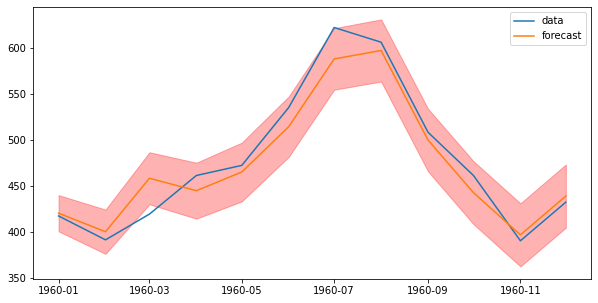

In [9]:
# Plot forecast and true values

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(test.index, test['Passengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, confint[:, 0], confint[:, 1], color='red', alpha=0.3)
ax.legend()

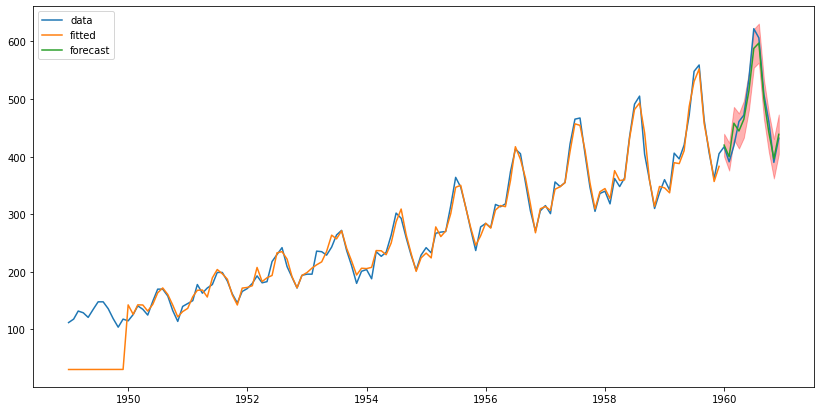

In [10]:
# Plot the full dataset including the forecast

train_pred = model.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(14,7))
ax.plot(df.index, df['Passengers'], label='data')
ax.plot(train.index, train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, confint[:, 0], confint[:, 1], color='red', alpha=0.3)
ax.legend()

In [11]:
# Testing the AutoARIMA on LogPassengers

logmodel = pm.auto_arima(train['LogPassengers'], trace=True, suppress_warnings=True, seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-438.800, Time=1.69 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-317.949, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-433.027, Time=0.67 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-383.189, Time=0.58 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-134.983, Time=0.02 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=-444.327, Time=1.46 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=-414.783, Time=0.66 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=-442.328, Time=5.94 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=-436.717, Time=1.49 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=6.01 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-445.402, Time=1.33 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=-414.732, Time=0.39 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=-443.005, Time=1.58 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=-443.344, Time=4.98 sec
 ARIMA(1,0,2)(1,1,0)[12]

In [12]:
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 229.026
Date:                              Mon, 15 Mar 2021   AIC                           -448.052
Time:                                      17:16:33   BIC                           -434.114
Sample:                                           0   HQIC                          -442.392
                                              - 132                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0193      0.009      2.156      0.031       0.002       0.037
ar.L1          0.6001      0.083      7.266      0.000       0.438       0.762
ar.L2          0.2416      0.085      2.852      0.004       0.076       0.408
ma.S.L12      -0.5668      0.105     -5.411      0.000      -0.772      -0.362
sigma2         0.0012      0.000      8.189      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.10
Prob(Q):                              1.00   Prob(JB):                         0.05
Heteroskedasticity (H):               0.36   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

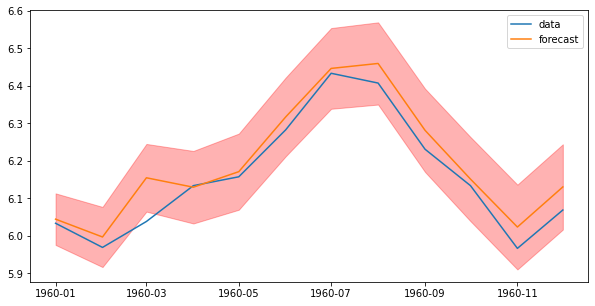

In [13]:
# Predict and Plot forecast with true values

test_pred_log, confint = logmodel.predict(n_periods=Ntest, return_conf_int=True)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(test.index, test['LogPassengers'], label='data')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index, confint[:, 0], confint[:, 1], color='red', alpha=0.3)
ax.legend()

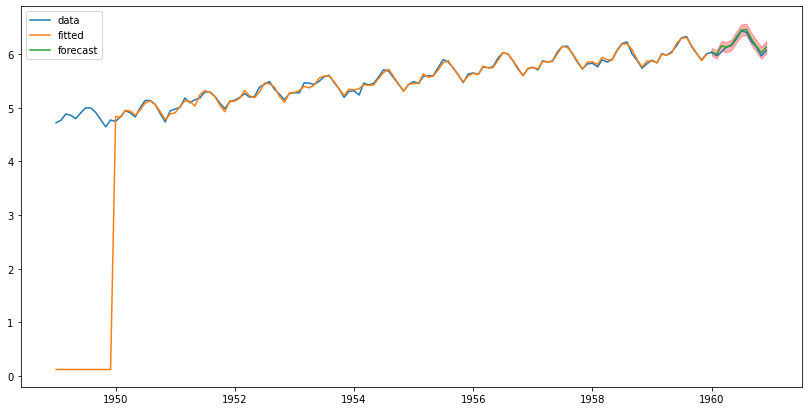

In [17]:
# Plot the full LOG dataset including the forecast

train_pred_log = logmodel.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(14,7))
ax.plot(df.index, df['LogPassengers'], label='data')
ax.plot(train.index, train_pred_log, label='fitted')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index, confint[:, 0], confint[:, 1], color='red', alpha=0.3)
ax.legend()

In [18]:
# Using the RMSE to see if the above models are as good a prediction as it appears

def rmse(t, y):
    return np.sqrt(np.mean((t - y) **2))

In [22]:
print("Non-logged RMSE:", rmse(test['Passengers'], test_pred))
print("Logged RMSE:", rmse(test['Passengers'], np.exp(test_pred_log)))

Non-logged RMSE: 18.536468860804916
Logged RMSE: 23.04152494073324


Looks like the non-logged values gave the better result

---
<br/>

# ARIMA (in code) pt. 2